In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

In [2]:
# convective turnover time (days) as a function of Teff (K)
# Cranmer & Sarr (2011) Eq.36
def tau(teff):
    return 314.24 * np.exp(-(teff/1952.5)-(teff/6250.)**18) + 0.002

# rotational modulation amplitude (ppm) vs Ro=Prot/tau
# https://arxiv.org/abs/2206.01595 Figure 7
params = {"robreak": 0.99, "Rbreak": 9.7e3, "bsat": -0.02, "bunsat": -4.55, "lnrsigma": 0.59}
def rper_ro(ro, p, sampling=False):
    ro = np.atleast_1d(ro)
    ret = (ro/p['robreak'])**p['bsat']
    idx = ro > p['robreak']
    ret[idx] = (ro[idx]/p['robreak'])**p['bunsat']
    if sampling:
        lnR = np.log(ret * p['Rbreak']) + np.random.randn(len(ret))*p['lnrsigma']
        return np.exp(lnR)
    else:
        return ret * p['Rbreak']

In [3]:
def amplitude_from_prot_and_teff(prot, teff, params, sampling=False):
    ro = prot / tau(teff)
    return ro, rper_ro(ro, params, sampling=sampling)

In [4]:
# mock data
N = int(1e5)
rnds = np.random.rand(N)
teff = 3500 + (6500 - 3500) * rnds
prot = 10**(np.random.randn(N)*0.5+0.5)

In [5]:
ro, amp_deterministic = amplitude_from_prot_and_teff(prot, teff, params)
_, amp_sample = amplitude_from_prot_and_teff(prot, teff, params, sampling=True)
idx = np.argsort(ro)

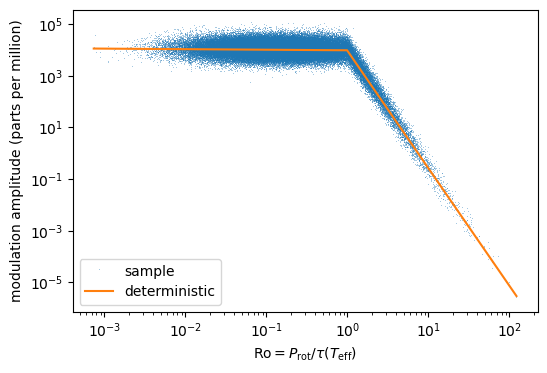

In [6]:
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$\mathrm{Ro}=P_\mathrm{rot}/\tau(T_\mathrm{eff})$")
plt.ylabel("modulation amplitude (parts per million)")
plt.plot(ro, amp_sample, ',', alpha=0.4, label='sample')
plt.plot(ro[idx], amp_deterministic[idx], '-', label='deterministic', zorder=1000);
plt.legend(loc='lower left')